# Human Activity Recognition

Imagine your smartwatch or fitness tracker quietly observing and understanding your every move. Thanks to gyroscopes and accelerometers tucked away inside these devices, they're not just counting steps; they're deciphering your physical activities in incredible detail. Whether you're strolling, jogging, cycling, or even cutting a rug on the dance floor, these sensors are like silent choreographers, capturing your every motion. Smart algorithms and Machine Learning magic work behind the scenes to turn this raw data into meaningful insights about your activities. It's not just about fitness tracking; it's about creating a personalized experience tailored to your lifestyle. From climbing stairs to busting out dance moves, these sensors are the unsung heroes transforming your everyday actions into a language that your device understands, making technology more human and intuitive than ever before.



## Importing libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import re
import warnings

warnings.filterwarnings("ignore", category=UserWarning)

## Data Preprocessing

Creating a list 'features' which contains the all 561 expert generated feature names by reading the data from features.txt file

In [107]:
features = list()
with open('UCI_HAR_Dataset/features.txt') as feat:
    features = [line.split()[1] for line in feat.readlines()]
print(f"Total number of features: ", len(features))

Total number of features:  561


### Retrieving Training data

Creating X_train and y_train dataframes (Training data) by reading the data from X_train.txt and y_train.txt respectively.

In [115]:
X_train = pd.read_csv('UCI_HAR_dataset/train/X_train.txt', delim_whitespace=True, header=None)

# Setting column names based on the 'features' list
X_train.columns = features
print("X_train shape: ", X_train.shape)

# Adding Subject ID as a column to X_train
X_train['subject'] = pd.read_csv('UCI_HAR_dataset/train/subject_train.txt', header=None)

y_train = pd.read_csv('UCI_HAR_dataset/train/y_train.txt', names=['Activity'])
y_train_labels = y_train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})
print("y_train shape: ", y_train.shape)

# Creating train_data with all features and labels
train_data = X_train
train_data['Activity'] = y_train
train_data['ActivityName'] = y_train_labels
print("\nTraining data shape: ", train_data.shape)
print("\nTraining data sample: ")
train_data.sample()


X_train shape:  (7352, 561)
y_train shape:  (7352, 1)

Training data shape:  (7352, 564)

Training data sample: 


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
3116,0.278133,-0.022245,-0.091973,-0.98902,-0.966259,-0.950853,-0.990339,-0.964975,-0.947809,-0.930858,...,-0.091486,0.331516,0.580707,-0.514653,-0.867491,0.137299,-0.069422,16,4,SITTING


### Retrieving Test data

Creating X_test and y_test dataframes (Testing data) by reading the data from X_test.txt and y_test.txt respectively.

In [116]:
X_test = pd.read_csv('UCI_HAR_dataset/test/X_test.txt', delim_whitespace=True, header=None)

# Setting column names based on the 'features' list
X_test.columns = features
print("X_test shape: ", X_test.shape)

# Adding Subject ID as a column to X_test
X_test['subject'] = pd.read_csv('UCI_HAR_dataset/test/subject_test.txt', header=None)

y_test = pd.read_csv('UCI_HAR_dataset/test/y_test.txt', names=['Activity'])
y_test_labels = y_train['Activity'].map({1: 'WALKING', 2:'WALKING_UPSTAIRS',3:'WALKING_DOWNSTAIRS',4:'SITTING', 5:'STANDING',6:'LAYING'})
print("y_test shape: ", y_test.shape)

# Creating test_data with all features and labels
test_data = X_test
test_data['Activity'] = y_test
test_data['ActivityName'] = y_test_labels
print("\nTesting data shape: ", test_data.shape)
print("\nTesting data sample: ")
test_data.sample()

X_test shape:  (2947, 561)
y_test shape:  (2947, 1)

Testing data shape:  (2947, 564)

Testing data sample: 


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity,ActivityName
2077,0.275024,-0.017242,-0.106836,-0.995524,-0.994191,-0.986277,-0.99573,-0.994054,-0.98748,-0.943039,...,0.399345,0.001658,0.228596,-0.959106,-0.714978,-0.034131,-0.136283,18,4,STANDING


### Checking for duplicates

In [120]:
if (sum(train_data.duplicated()) and sum(test_data.duplicated())) == 0:
    print("\nNo duplicates found!")
else:
    print("Number of duplicates in train_data: ", sum(train_data.duplicated()))
    print("Number of duplicates in test_data: ", sum(test_data.duplicated()))


No duplicates found!


### Checking for Null values

In [127]:
if (train_data.isnull().values.sum() and test_data.isnull().values.sum()) == 0:
    print("\nNo Null values found!")
else:
    print("Null values in train_data: ", (train_data.isnull().values.sum()))
    print("Null values in test_data: ", (test_data.isnull().values.sum()))


No Null values found!


### Checking for data imbalance through Visualization

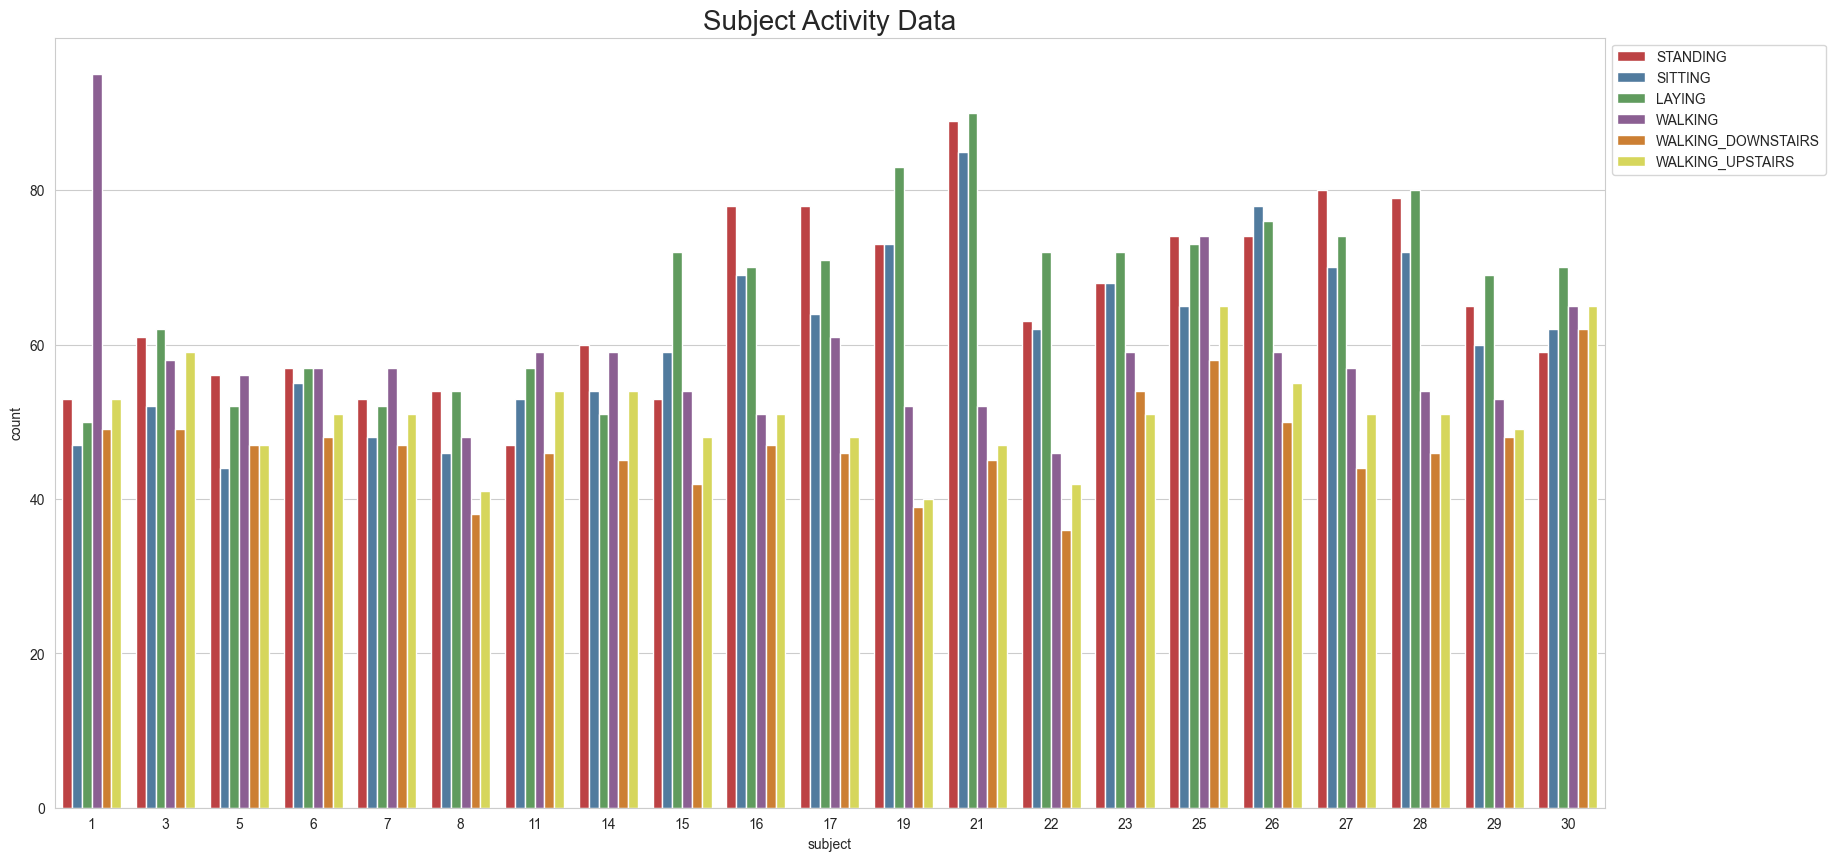

In [133]:
sns.set_style('whitegrid')
plt.figure(figsize=(20,10))
plt.title("Subject Activity Data", fontsize=20)
ax = sns.countplot(x='subject', hue='ActivityName', data=train_data)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

There are almost the same number of readings from all the subjects.

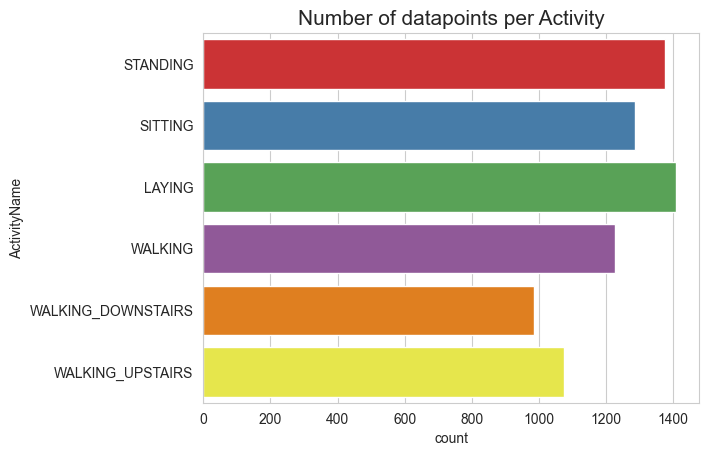

In [155]:
sns.set_palette("Set1")
plt.title('Number of datapoints per Activity', fontsize=15)
sns.countplot(y='ActivityName', data=train_data, hue='ActivityName')
plt.show()

The visulizations suggests that the data is close to being balanced.

### Renaming features

Renaming all the features to remove hypens '-' commas ',' and parenthesis '()'

In [156]:
def rename_feature(column):
    return re.sub(r'[-,\(\)]', '', column)

In [157]:
train_data.columns = train_data.columns.map(rename_feature)
test_data.columns = test_data.columns.map(rename_feature)

In [158]:
print(train_data.columns)
print(test_data.columns)

Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)
Index(['tBodyAccmeanX', 'tBodyAccmeanY', 'tBodyAccmeanZ', 'tBodyAccstdX',
       'tBodyAccstdY', 'tBodyAccstdZ', 'tBodyAccmadX', 'tBodyAccmadY',
       'tBodyAccmadZ', 'tBodyAccmaxX',
       ...
       'angletBodyAccMeangravity', 'angletBodyAccJerkMeangravityMean',
       'angletBodyGyroMeangravityMean', 'angletBodyGyroJerkMeangravityMean',
       'angleXgravityMean', 'angleYgravityMean', 'angleZgravityMean',
       'subject', 'Activity', 'ActivityName'],
      dtype='object', length=564)


### Saving the dataframes in csv files

In [159]:
train_data.to_csv('UCI_HAR_Dataset/csv_files/train.csv', index=False)
test_data.to_csv('UCI_HAR_Dataset/csv_files/test.csv', index=False)

## Exploratory Data Analysis

### 1. Featuring Engineering from Domain Knowledge

+ __Static and Dynamic Activities__

    - In Static activities i.e., Stationary activities (SITTING, STANDING, LAYING) motion information will not be very useful.
	- In Dynamic activities i.e., Moving activities (WALKING, WALKING_UPSTAIRS, WALKING_DOWNSTAIRS) motion information will be significant.

### 2. The disparity between stationary and moving activities is substantial.

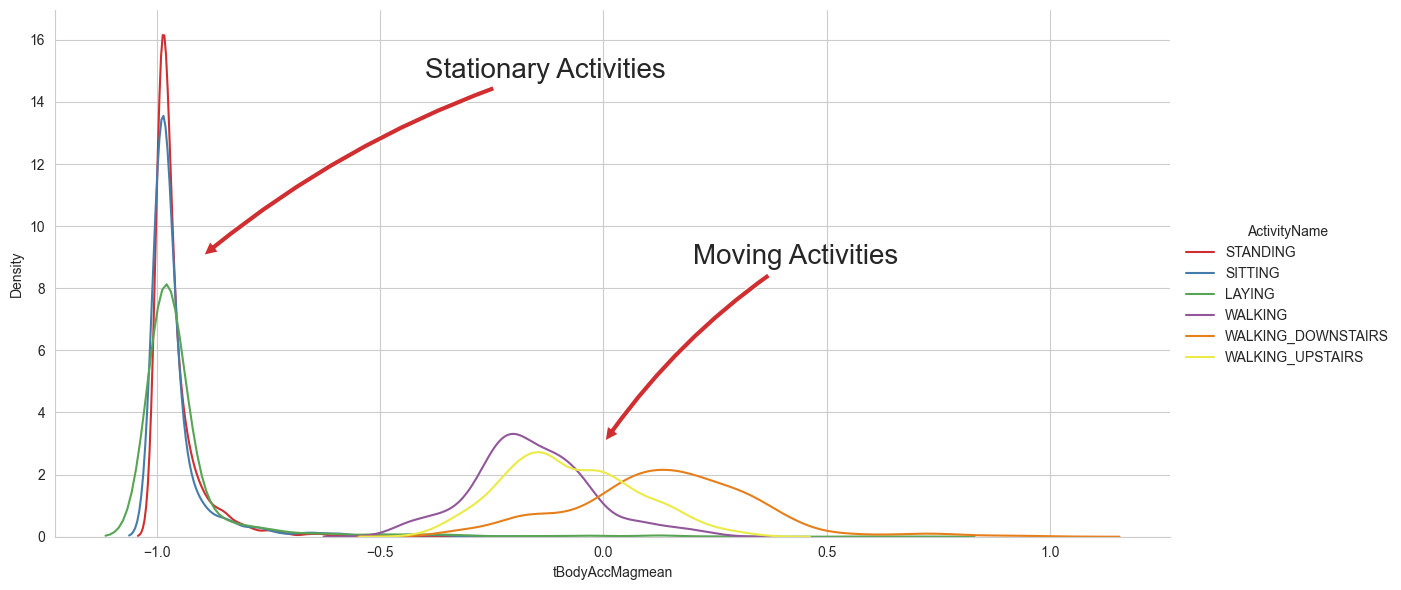

In [160]:
sns.set_palette("Set1", desat=0.80)
facetgrid = sns.FacetGrid(train_data, hue='ActivityName', height=6, aspect=2)
facetgrid.map(sns.distplot, 'tBodyAccMagmean', hist=False).add_legend()

plt.annotate("Stationary Activities", xy=(-0.9, 9), xytext=(-0.4, 15), size=20,
             va='center', ha='left',
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

plt.annotate("Moving Activities", xy=(0, 3), xytext=(0.2, 9), size=20,
             va='center', ha='left',
             arrowprops=dict(arrowstyle="simple", connectionstyle="arc3,rad=0.1"))

plt.show()

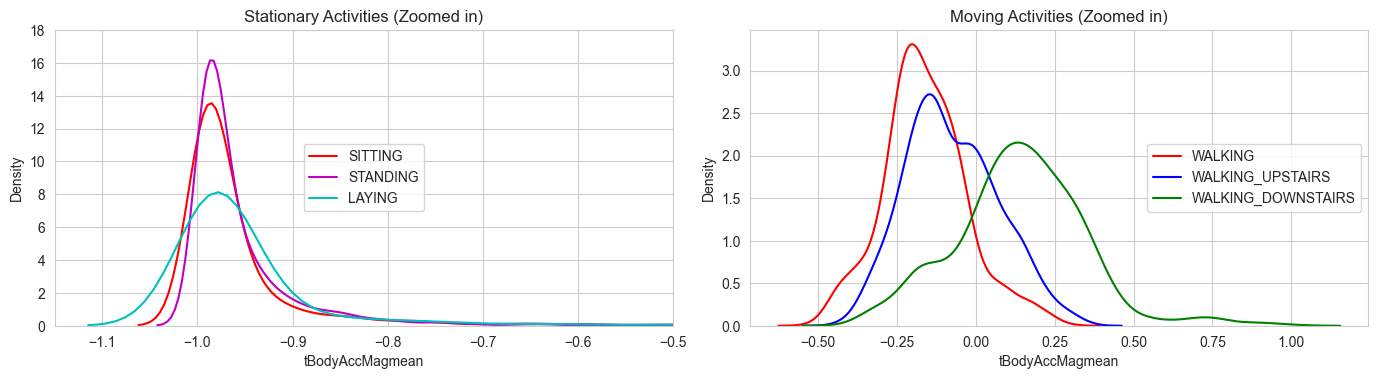

In [161]:
# For more visualizations, taking datapoints of each activity to a different dataframes
df1 = train_data[train_data['Activity']==1]
df2 = train_data[train_data['Activity']==2]
df3 = train_data[train_data['Activity']==3]
df4 = train_data[train_data['Activity']==4]
df5 = train_data[train_data['Activity']==5]
df6 = train_data[train_data['Activity']==6]

plt.figure(figsize=(14,7))
plt.subplot(2,2,1)
plt.title('Stationary Activities (Zoomed in)')
sns.distplot(df4['tBodyAccMagmean'],color = 'r',hist = False, label = 'SITTING')
sns.distplot(df5['tBodyAccMagmean'],color = 'm',hist = False,label = 'STANDING')
sns.distplot(df6['tBodyAccMagmean'],color = 'c',hist = False, label = 'LAYING')
plt.axis([-1.15, -0.5, 0, 18])
plt.legend(loc='center')

plt.subplot(2,2,2)
plt.title('Moving Activities (Zoomed in)')
sns.distplot(df1['tBodyAccMagmean'],color = 'red',hist = False, label = 'WALKING')
sns.distplot(df2['tBodyAccMagmean'],color = 'blue',hist = False,label = 'WALKING_UPSTAIRS')
sns.distplot(df3['tBodyAccMagmean'],color = 'green',hist = False, label = 'WALKING_DOWNSTAIRS')
plt.legend(loc='center right')


plt.tight_layout()
plt.show()

### 3. Magnitude of Acceleration can also be used to separate the data

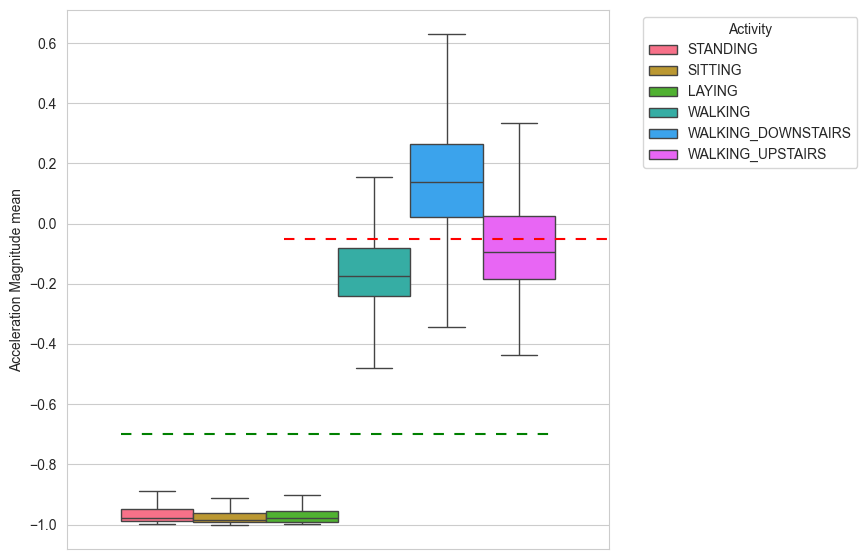

In [162]:
plt.figure(figsize=(7,7))
color_palette = sns.color_palette("husl", n_colors=len(train_data['ActivityName'].unique()))
sns.boxplot(hue='ActivityName', y='tBodyAccMagmean',data=train_data, showfliers=False, saturation=1, palette=color_palette)
plt.ylabel('Acceleration Magnitude mean')
plt.axhline(y=-0.7, xmin=0.1, xmax=0.9,dashes=(5,5), c='g')
plt.axhline(y=-0.05, xmin=0.4, dashes=(5,5), c='r')
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

+ __Observation:__

    - If tAccMean is < -0.8 then the Activities are either STANDING or SITTING or LAYING.
    - If tAccMean is > -0.6 then the Activities are either WALKING or WALKING_DOWNSTAIRS or WALKING_UPSTAIRS.
    - If tAccMean > 0.0 then the Activity is WALKING_DOWNSTAIRS.
    - We can classify 75% the Activity labels with some errors.

### 4. Visualizing with Gravity Acceleration Components

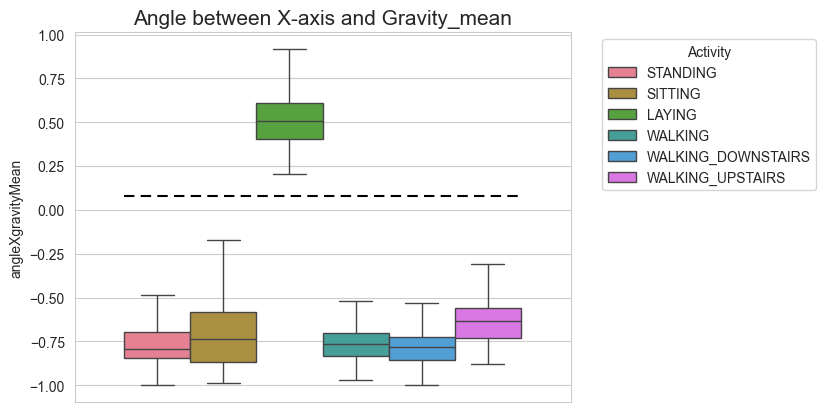

In [163]:
sns.boxplot(hue='ActivityName', y='angleXgravityMean', data=train_data, showfliers=False, palette=color_palette)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,c='black',dashes=(5,3))
plt.title('Angle between X-axis and Gravity_mean', fontsize=15)
plt.legend(title='Activity', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

+ __Observation:__

    - If angleX,gravityMean > 0 then Activity is LAYING.
    - We can classify all datapoints belonging to LAYING activity with just a single if else statement.

## Applying t-SNE on the data for detailed visualization

__t-SNE (t-distributed stochastic neighbor embedding) is a popular technique for dimensionality reduction and visualization of high-dimensional data. It is commonly used to visualize patterns or clusters within the data.__ 

In [166]:
def apply_tsne(X_data, y_data, perplexities, n_iter=1000, img_name_prefix='t-sne'):
        
    for index,perplexity in enumerate(perplexities):
        # Applying t-SNE
        print('\Applying t-SNE with perplexity {} and with {} iterations at max'.format(perplexity, n_iter))
        X_reduced = TSNE(verbose=2, perplexity=perplexity).fit_transform(X_data)
        print('Completed!')
        
        # Preparing the data for Seaborn         
        print('Creating plot for this t-SNE visualization..')
        df = pd.DataFrame({'x':X_reduced[:,0], 'y':X_reduced[:,1] ,'Activity':y_data})
        
        # Drawing the plot in appropriate place in the grid
        sns.lmplot(data=df, x='x', y='y', hue='Activity', fit_reg=False, height=8,\
                   palette="Set1",markers=['^','v','s','o', '1','2'])
        plt.title("perplexity : {} and max_iter : {}".format(perplexity, n_iter))
        img_name = img_name_prefix + '_perp_{}_iter_{}.png'.format(perplexity, n_iter)
        print('Saving this plot as image in present working directory...')
        plt.savefig(img_name)
        plt.show()

\Applying t-SNE with perplexity 2 and with 1000 iterations at max
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.009s...
[t-SNE] Computed neighbors for 7352 samples in 0.351s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.597443
[t-SNE] Computed conditional probabilities in 0.008s
[t-SNE] Iteration 50: error = 119.3286438, gradient norm = 0.0435555 (50 iterations in 1.225s)
[t-SNE] Iteration 100: error = 105.1313934, gradient norm = 0.0249483 (50 iterations in 0

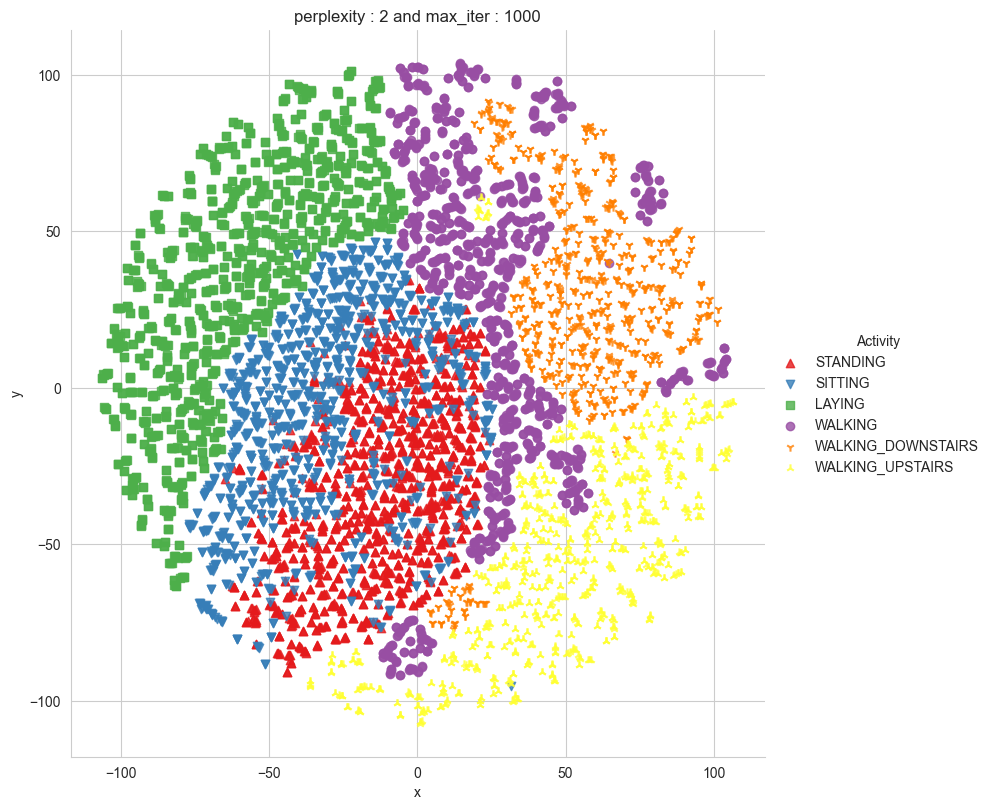

\Applying t-SNE with perplexity 5 and with 1000 iterations at max
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 0.346s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 0.961446
[t-SNE] Computed conditional probabilities in 0.015s
[t-SNE] Iteration 50: error = 107.1635132, gradient norm = 0.0394312 (50 iterations in 1.249s)
[t-SNE] Iteration 100: error = 95.6929474, gradient norm = 0.0150110 (50 iterations in 0

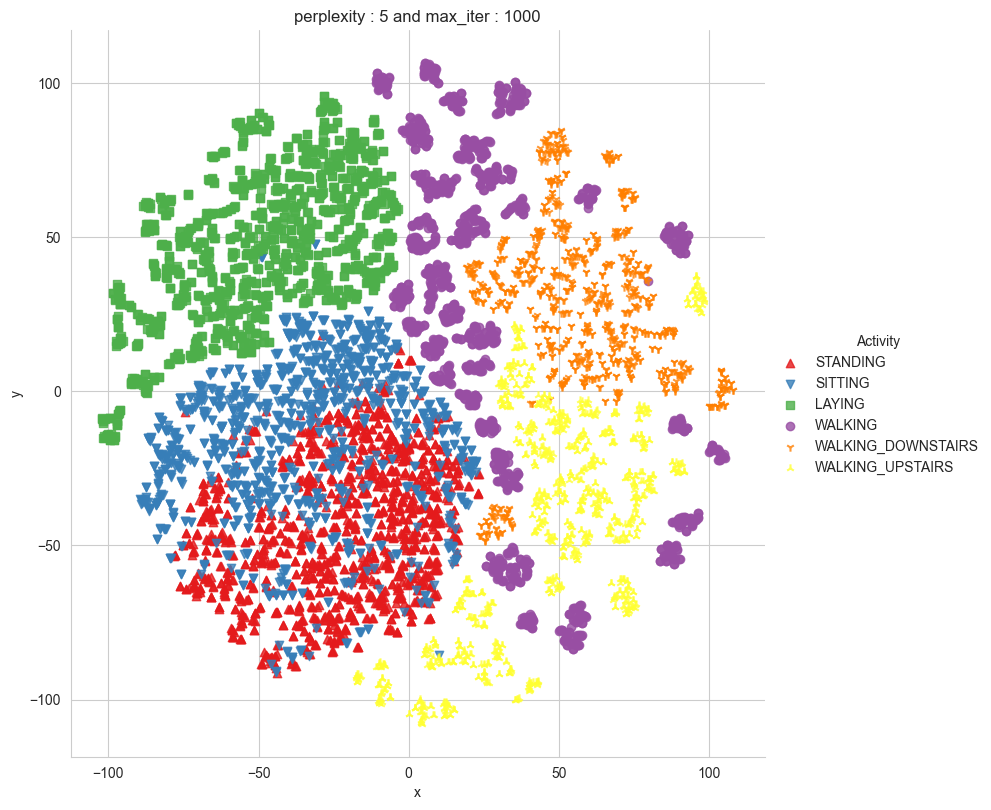

\Applying t-SNE with perplexity 10 and with 1000 iterations at max
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 0.398s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.133827
[t-SNE] Computed conditional probabilities in 0.027s
[t-SNE] Iteration 50: error = 97.9033203, gradient norm = 0.0338649 (50 iterations in 1.316s)
[t-SNE] Iteration 100: error = 88.9367828, gradient norm = 0.0104218 (50 iterations in 0

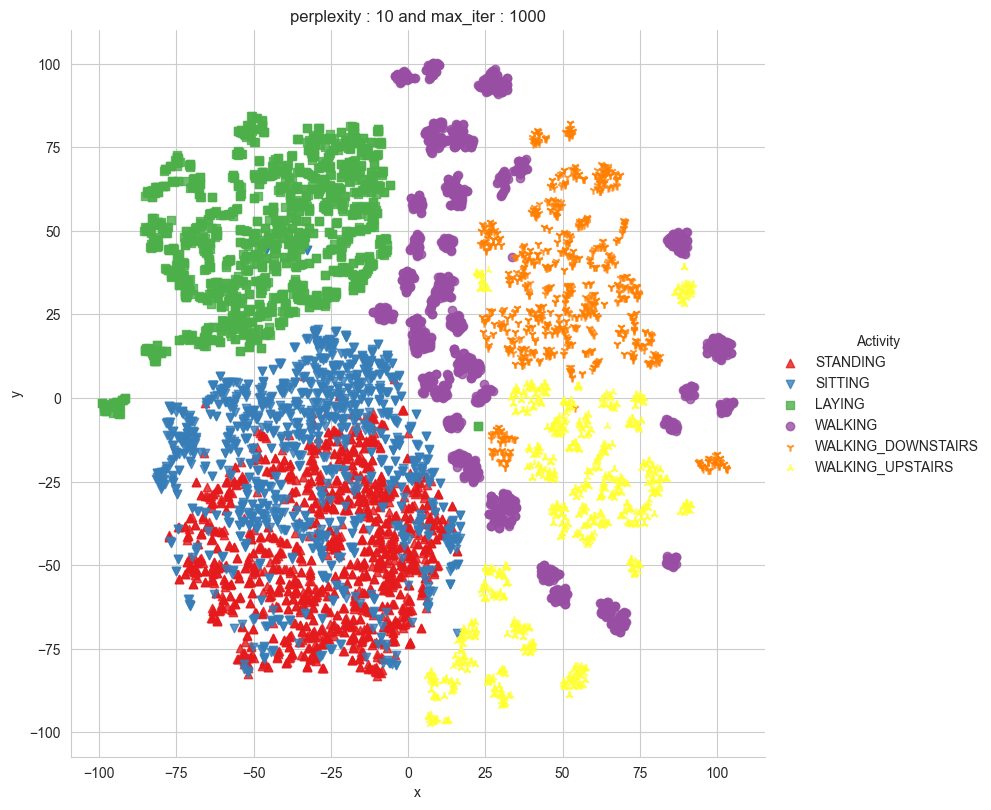

\Applying t-SNE with perplexity 20 and with 1000 iterations at max
[t-SNE] Computing 61 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.007s...
[t-SNE] Computed neighbors for 7352 samples in 0.431s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.274336
[t-SNE] Computed conditional probabilities in 0.053s
[t-SNE] Iteration 50: error = 89.3083191, gradient norm = 0.0301464 (50 iterations in 1.393s)
[t-SNE] Iteration 100: error = 82.9649429, gradient norm = 0.0074058 (50 iterations in 0

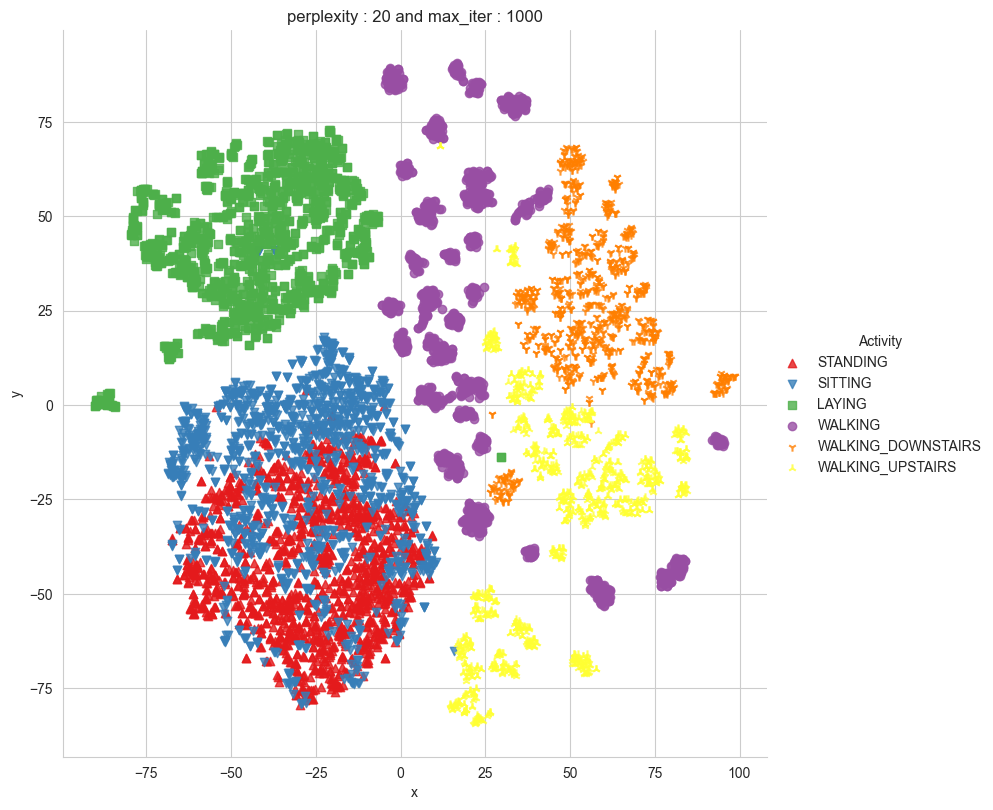

\Applying t-SNE with perplexity 50 and with 1000 iterations at max
[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 0.515s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] Computed conditional probabilities in 0.133s
[t-SNE] Iteration 50: error = 78.8784637, gradient norm = 0.0241929 (50 iterations in 1.810s)
[t-SNE] Iteration 100: error = 75.2893677, gradient norm = 0.0052126 (50 iterations in 

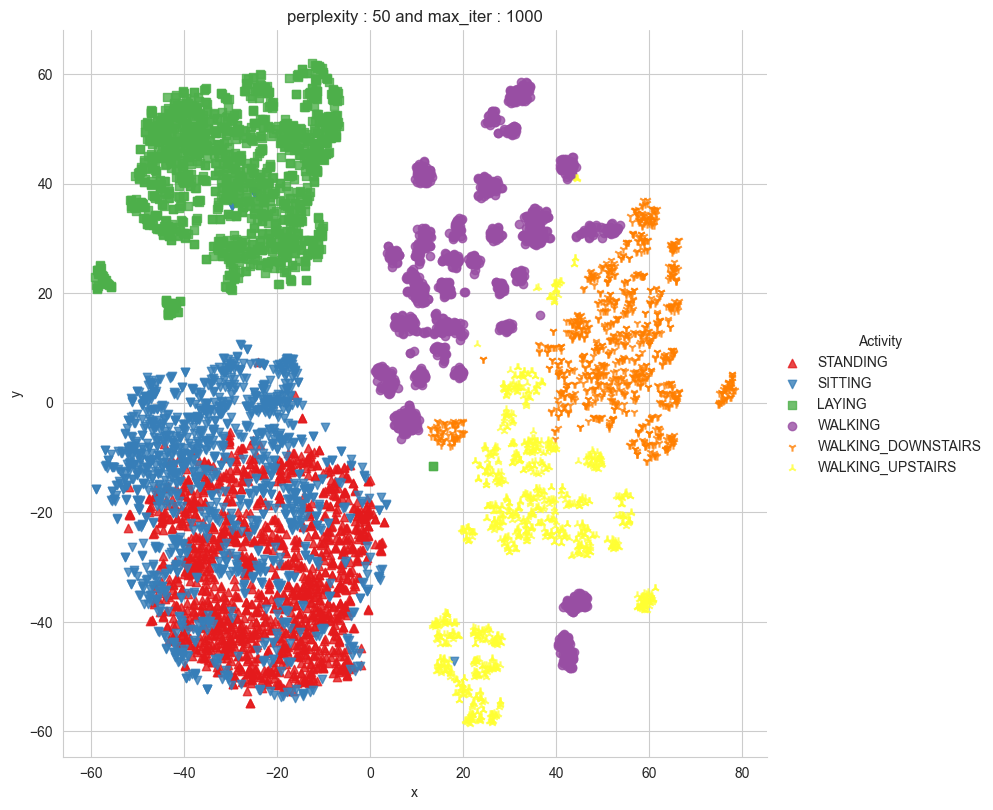

In [167]:
X_pre_tsne = train_data.drop(['subject', 'Activity','ActivityName'], axis=1)
y_pre_tsne = train_data['ActivityName']
apply_tsne(X_data = X_pre_tsne,y_data=y_pre_tsne, perplexities =[2,5,10,20,50])

## Machine Learning

### Retrieving Training and Test data

In [149]:
train = pd.read_csv('UCI_HAR_dataset/csv_files/train.csv')
test = pd.read_csv('UCI_HAR_dataset/csv_files/test.csv')
print(f"Train data shape: {train.shape}\nTest data shape: {test.shape}\n" )
test.head()

Train data shape: (7352, 564)
Test data shape: (2947, 564)



,tBodyAccmeanX,tBodyAccmeanY,tBodyAccmeanZ,tBodyAccstdX,tBodyAccstdY,tBodyAccstdZ,tBodyAccmadX,tBodyAccmadY,tBodyAccmadZ,tBodyAccmaxX,...,angletBodyAccMeangravity,angletBodyAccJerkMeangravityMean,angletBodyGyroMeangravityMean,angletBodyGyroJerkMeangravityMean,angleXgravityMean,angleYgravityMean,angleZgravityMean,subject,Activity,ActivityName
0,0.257178,-0.023285,-0.014654,-0.938404,-0.920091,-0.667683,-0.952501,-0.925249,-0.674302,-0.894088,...,0.006462,0.162920,-0.825886,0.271151,-0.720009,0.276801,-0.057978,2,5,STANDING
1,0.286027,-0.013163,-0.119083,-0.975415,-0.967458,-0.944958,-0.986799,-0.968401,-0.945823,-0.894088,...,-0.083495,0.017500,-0.434375,0.920593,-0.698091,0.281343,-0.083898,2,5,STANDING
2,0.275485,-0.026050,-0.118152,-0.993819,-0.969926,-0.962748,-0.994403,-0.970735,-0.963483,-0.939260,...,-0.034956,0.202302,0.064103,0.145068,-0.702771,0.280083,-0.079346,2,5,STANDING
3,0.270298,-0.032614,-0.117520,-0.994743,-0.973268,-0.967091,-0.995274,-0.974471,-0.968897,-0.938610,...,-0.017067,0.154438,0.340134,0.296407,-0.698954,0.284114,-0.077108,2,5,STANDING
4,0.274833,-0.027848,-0.129527,-0.993852,-0.967445,-0.978295,-0.994111,-0.965953,-0.977346,-0.938610,...,-0.002223,-0.040046,0.736715,-0.118545,-0.692245,0.290722,-0.073857,2,5,STANDING


Creating training and testing data

In [150]:
X_train = train.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_train = train.Activity
X_test = test.drop(['subject', 'Activity', 'ActivityName'], axis=1)
y_test = test.Activity
print("Dataframe shapes:\n")
print(f'X_train: {X_train.shape}\ny_train: {y_train.shape}')
print(f'X_test: {X_test.shape}\ny_test: {y_test.shape}')

Dataframe shapes:

X_train: (7352, 561)
y_train: (7352,)
X_test: (2947, 561)
y_test: (2947,)


In [151]:
labels=['LAYING', 'SITTING','STANDING','WALKING','WALKING_DOWNSTAIRS','WALKING_UPSTAIRS']

In [152]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Cross Validation

In [153]:
import time
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, roc_auc_score, confusion_matrix, roc_curve, auc, classification_report
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

Label Encoding for model interpretability

In [154]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
class_mapping = dict(zip(label_encoder.classes_, label_encoder.transform(label_encoder.classes_)))
print("Class mapping:", class_mapping)
labels = ['LAYING', 'SITTING', 'STANDING', 'WALKING', 'WALKING_DOWNSTAIRS', 'WALKING_UPSTAIRS']

# Display the updated shapes of the dataframes
print("\nDataframe shapes after label encoding:\n")
print(f'X_train: {X_train.shape}\ny_train_encoded: {y_train_encoded.shape}')
print(f'X_test: {X_test.shape}\ny_test_encoded: {y_test_encoded.shape}')

# Display the first few entries of the encoded training labels for reference
print("\nEncoded training labels:\n")
print(y_train_encoded[:100])
print(y_test_encoded[:100])

Class mapping: {1: 0, 2: 1, 3: 2, 4: 3, 5: 4, 6: 5}

Dataframe shapes after label encoding:

X_train: (7352, 561)
y_train_encoded: (7352,)
X_test: (2947, 561)
y_test_encoded: (2947,)

Encoded training labels:

[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
[4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [249]:
# models = [('Logistic Regression', LogisticRegression()),
#           ('SVC', SVC()),
#           ('Stochastic GD', SGDClassifier()),
#           ('Decision Tree', DecisionTreeClassifier()),
#           ('KNN', KNeighborsClassifier()),
#           ('XGBoost', XGBClassifier()),
#           ('Random Forest', RandomForestClassifier()),
#           ]
# cv_results = {'Model': [], 'CV Score': [], 'Time Taken': []}
# print("------Cross Validation------\n")

# for idx, (name, model) in enumerate(models, 1):
#     start_time = time.time()
#     cv_scores = cross_val_score(model, X_train, y_train_encoded, cv=3, scoring='accuracy')
#     end_time = time.time()
#     time_taken = end_time - start_time

#     # Print progress information
#     print(f"Model {idx}/{len(models)} ({name}):")
#     print(f"  - CV Score: {cv_scores.mean()}")
#     print(f"  - Time Taken: {time_taken} seconds\n")

#     cv_results['Model'].append(name)
#     cv_results['CV Score'].append(cv_scores.mean())
#     cv_results['Time Taken'].append(time_taken)

# cv_results_df = pd.DataFrame(cv_results).sort_values(by='CV Score', ascending=False)
# print(cv_results_df)

In [276]:
models = [('Logistic Regression', LogisticRegression()),
          ('SVC', SVC()),
          ('Stochastic GD', SGDClassifier()),
          ('Decision Tree', DecisionTreeClassifier()),
          ('KNN', KNeighborsClassifier()),
          ('XGBoost', XGBClassifier()),
          ('Random Forest', RandomForestClassifier()),
          ]
cv_results = {'Model': [], 'CV Score': [], 'Time Taken': []}

print("------Cross Validation------\n")
for name, model in models:
    start_time = time.time()
    # cv_scores = cross_val_score(model,X_train,y_train,cv=3,scoring='accuracy')
    cv_scores = cross_val_score(model, X_train, y_train_encoded, cv=10, scoring='accuracy')
    end_time = time.time()
    time_taken = end_time - start_time
    cv_results['Model'].append(name)
    cv_results['CV Score'].append(cv_scores.mean())
    cv_results['Time Taken'].append(time_taken)

cv_results_df = pd.DataFrame(cv_results).sort_values(by='CV Score', ascending=False)
cv_results_df

------Cross Validation------



,Model,CV Score,Time Taken
0,Logistic Regression,0.945871,8.668912
5,XGBoost,0.939475,39.373406
1,SVC,0.937709,27.550323
2,Stochastic GD,0.931996,7.082180
6,Random Forest,0.930500,68.844845
4,KNN,0.880991,0.391106
3,Decision Tree,0.856509,28.109304


In [68]:
# models = [('Logistic Regression', LogisticRegression()),
#           ('SVC', SVC()),
#           ('Stochastic GD', SGDClassifier()),
#           ('Decision Tree', DecisionTreeClassifier()),
#           ('KNN', KNeighborsClassifier()),
#           ('XGBoost', XGBClassifier()),
#           ('Random Forest', RandomForestClassifier()),
#           ]

# cv_results = {'Model': [], 'CV Score': [], 'Time Taken': []}

# print("------Cross Validation------\n")

# # Collect CV scores for each model and CV value
# for cv_value in range(2, 11):
#     print(f"\nCV = {cv_value}\n")
#     cv_results[f'CV={cv_value}'] = []
#     for name, model in models:
#         print(name)
#         start_time = time.time()
#         cv_scores = cross_val_score(model, X_train, y_train_encoded, cv=cv_value, scoring='accuracy')
#         end_time = time.time()
#         cv_results['Model'].extend([name] * len(cv_scores))
#         cv_results['CV Score'].extend(cv_scores)
#         cv_results[f'CV={cv_value}'].extend(cv_scores)
#         cv_results['Time Taken'].append(time_taken)

# # Ensure consistent lengths in the dictionary
# max_len = max(len(cv_results['Model']), len(cv_results['CV Score']))
# cv_results = {key: (value + [None] * (max_len - len(value))) for key, value in cv_results.items()}

# # Create DataFrame
# cv_results_df = pd.DataFrame(cv_results)
# best_cv_value = cv_results_df.loc[:, 'CV=2':].mean(axis=0).idxmax()
# print(f"\nBest CV Value: {best_cv_value}")

------Cross Validation------

CV = 2

Logistic Regression
SVC
Stochastic GD
Decision Tree
KNN
XGBoost
Random Forest
CV = 3

Logistic Regression
SVC
Stochastic GD
Decision Tree
KNN
XGBoost
Random Forest
CV = 4

Logistic Regression
SVC
Stochastic GD
Decision Tree
KNN
XGBoost
Random Forest
CV = 5

Logistic Regression
SVC
Stochastic GD
Decision Tree
KNN
XGBoost
Random Forest
CV = 6

Logistic Regression
SVC
Stochastic GD
Decision Tree
KNN
XGBoost
Random Forest
CV = 7

Logistic Regression
SVC
Stochastic GD
Decision Tree
KNN
XGBoost
Random Forest
CV = 8

Logistic Regression
SVC
Stochastic GD
Decision Tree
KNN
XGBoost
Random Forest
CV = 9

Logistic Regression
SVC
Stochastic GD
Decision Tree
KNN
XGBoost
Random Forest
CV = 10

Logistic Regression
SVC
Stochastic GD
Decision Tree
KNN
XGBoost
Random Forest

Best CV Value: CV=10


### Hyperparameter Tuning

***Logistic Regression***:

* **C**: Regularization parameter. Controls the trade-off between fitting the training data well and preventing overfitting.

***SVC (Support Vector Machine Classifier)***:

* **C**: Regularization parameter. Trades off correct classification of training data against maximization of the decision function's margin.
* **kernel**: Specifies the kernel type to be used in the algorithm ('linear', 'poly', 'rbf', 'sigmoid').
* **gamma**: gamma: Kernel coefficient for 'rbf', 'poly', and 'sigmoid'. Controls the shape of the decision boundary. Small gamma value - Smooth decision boundary. Large - Rough decision boundary

***Stochastic Gradient Descent***:

* **alpha**: L2 regularization term.
* **learning_rate**: The learning rate schedule for weight updates.

**Decision Tree**:

* **criterion**: The function to measure the quality of a split (Gini impurity or entropy).
* **max_depth**: Maximum depth of the tree.
* **min_samples_split**: Minimum number of samples required to split an internal node.
* **min_samples_leaf**: Minimum number of samples required to be at a leaf node.

***KNN (K-Nearest Neighbors)***:

* **n_neighbors**: Number of neighbors to consider.
* **weights**: Weight function used in prediction ('uniform' or 'distance').
* **p**: Power parameter for the Minkowski metric (1 for Manhattan distance, 2 for Euclidean distance).

***XGBoost***:

* **learning_rate**: Step size shrinkage used in update to prevent overfitting.
* **n_estimators**: Number of boosting rounds.
* **max_depth**: Maximum depth of a tree.

***Random Forest***:

* **n_estimators**: Number of trees in the forest.
* **max_depth**: Maximum depth of the tree.
* **min_samples_split**: Minimum number of samples required to split an internal node.
* **min_samples_leaf**: Minimum number of samples required to be at a leaf node.

Defining the hyperparameters for all models in a dictionary

In [336]:
hyperparameters = {
    'Logistic Regression': {
        'C': [0.001, 0.01, 0.1, 1, 10, 20, 30, 40, 50, 100]
    },
    'SVC': {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],
        'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
        'gamma': ['scale', 'auto', 0.001, 0.01, 0.1, 1, 10]
    },
    'Stochastic GD': {
        'alpha': [0.0001, 0.001, 0.01, 0.1, 1],
        'eta0': [0.001, 0.01, 0.1, 0.5, 1.0],
        'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive']
    },
    'Decision Tree': {
        'max_depth': [None, 10, 20, 30, 40],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    },
    'KNN': {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance'],
        'p': [1, 2]
    },
    'XGBoost': {
        'learning_rate': [0.01, 0.1, 0.2],
        'n_estimators': [50, 100, 200],
        'max_depth': [3, 5, 7]
    },
    'Random Forest': {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20, 30],
        'min_samples_split': [2, 5, 10]
    }
}

Creating a list of models and passing in the hyperparameters dictionary

In [167]:
# models = [
#     ('Logistic Regression', LogisticRegression(), hyperparameters['Logistic Regression']),
#     ('SVC', SVC(C=16, kernel='rbf', gamma=0.01),{}),
#     ('Stochastic GD', SGDClassifier(), hyperparameters['Stochastic GD']),
#     ('Decision Tree', DecisionTreeClassifier(), hyperparameters['Decision Tree']),
#     ('KNN', KNeighborsClassifier(), hyperparameters['KNN']),
#     ('XGBoost', XGBClassifier(), hyperparameters['XGBoost']),
#     ('Random Forest', RandomForestClassifier(), hyperparameters['Random Forest'])
# ]
# cv_results = {'Model': [], 'CV Score': []}
# results = {'Model': [], 'Accuracy': [],'AUC-ROC': [],'Precision': [], 'Recall': [], 'F1 Score': [], 'Time Taken': []}

Performing Hyperparameter Tuning

In [169]:
# best_param = {'Model': [], 'Best Parameters': [], 'Best Accuracy': []}
# print("------Hyperparameter Tuning------\n")
# for cv_value in range(2, 11):
#     cv_results[f'CV={cv_value}'] = []
#     print(f"CV = {cv_value}\n")

#     for name, model, param_grid in models:
#         grid_search = GridSearchCV(model, param_grid, cv=cv_value, scoring='accuracy')
#         grid_search.fit(X_train, y_train_encoded)

#         best_params = grid_search.best_params_
#         best_accuracy = grid_search.best_score_

#         best_param['Model'].append(name)
#         best_param['Best Parameters'].append(best_params)
#         best_param['Best Accuracy'].append(best_accuracy)

#         cv_results['Model'].append(name)
#         cv_results[f'CV={cv_value}'].append(best_accuracy)

#         print(f"Model: {name}")
#         print(f"Best Parameters: {best_params}")
#         print(f"Best Accuracy: {best_accuracy}\n")
#     print("---------------------------")

# best_param_df = pd.DataFrame(best_param).sort_values(by='Best Accuracy', ascending=False)
# best_param_df

# cv_results_df = pd.DataFrame({key: (value + [None] * (len(cv_results['Model']) - len(value))) for key, value in cv_results.items()})
# print("\n------Cross-Validation Results------\n")
# print(cv_results_df)

# best_cv_value = cv_results_df.loc[:, 'CV=2':].mean(axis=0).idxmax()
# print(f"\nBest CV Value: {best_cv_value}")

------Hyperparameter Tuning------

CV = 2

Model: KNN
Best Parameters: {'n_neighbors': 7, 'p': 1, 'weights': 'uniform'}
Best Accuracy: 0.8944504896626768

---------------------------
CV = 3

Model: KNN
Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best Accuracy: 0.9023434555380699

---------------------------
CV = 4

Model: KNN
Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best Accuracy: 0.8964907508161044

---------------------------
CV = 5

Model: KNN
Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best Accuracy: 0.9069680027007404

---------------------------
CV = 6

Model: KNN
Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best Accuracy: 0.908324843803753

---------------------------
CV = 7

Model: KNN
Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 'distance'}
Best Accuracy: 0.921519382253377

---------------------------
CV = 8

Model: KNN
Best Parameters: {'n_neighbors': 9, 'p': 1, 'weights': 

Function to plot confusion matrix for a given model

In [155]:
from sklearn.metrics.pairwise import itertools


def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Greens):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

### Model Training & Testing

Refreshing the models list with best hyperparameters

In [334]:
models = [
    ('Logistic Regression', LogisticRegression(C=10)),
    ('SVC', SVC(C=16, kernel='rbf', gamma=0.01, probability=True)),
    ('Stochastic GD', SGDClassifier(alpha=0.001, eta0=0.01, learning_rate='adaptive',loss='log_loss', max_iter=1000)),
    ('KNN', KNeighborsClassifier(n_neighbors=7, weights='distance', p=1)),
]
cv_results = {'Model': [], 'CV Score': []}
results = {'Model': [], 'Accuracy': [],'AUC-ROC': [],'Precision': [], 'Recall': [], 'F1 Score': [], 'Time Taken': []}

Training & Testing all the models. Plotting the confusion matrix for all and calculating all evaluation metrics.


------Training & Testing------



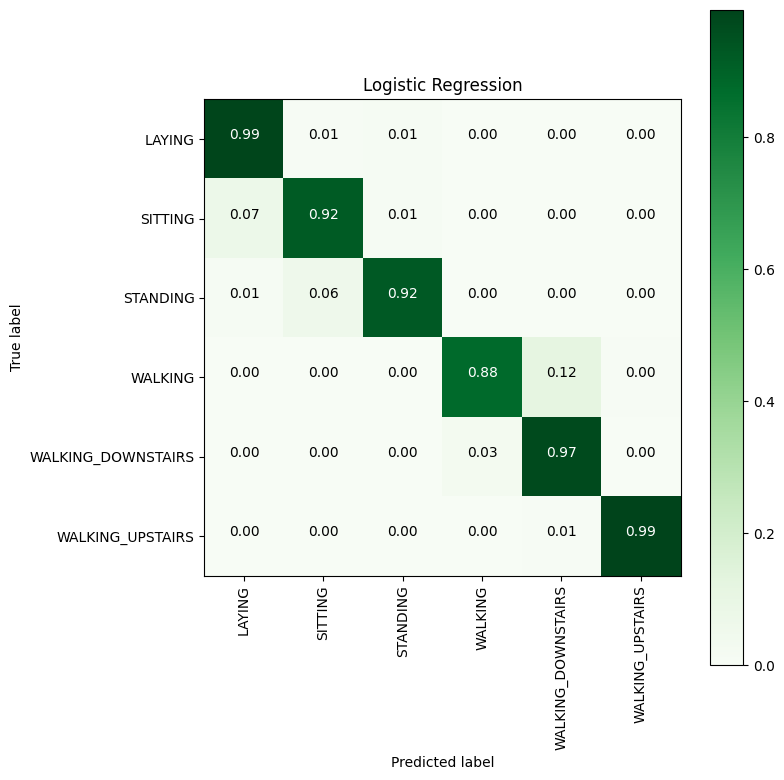

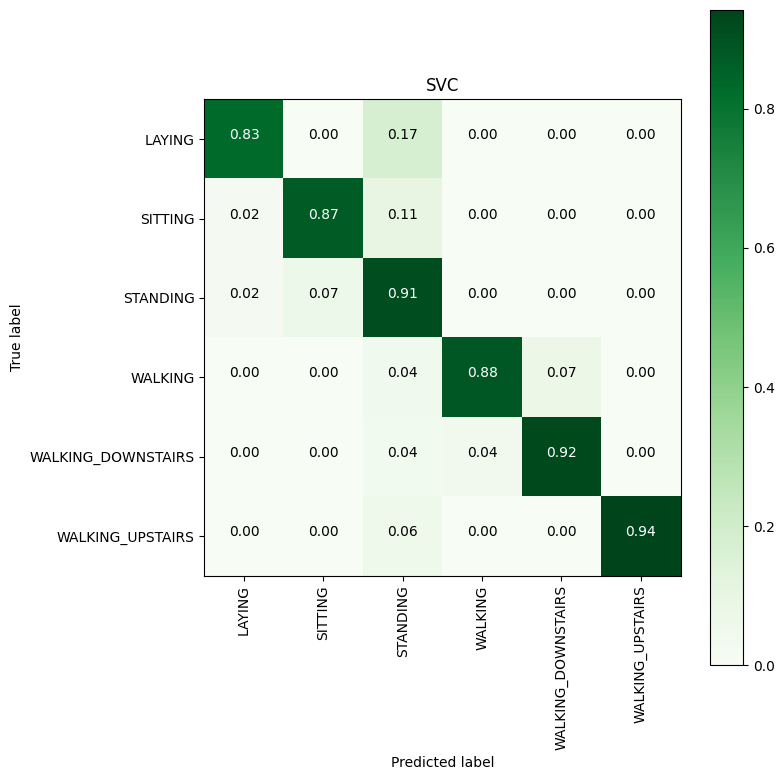

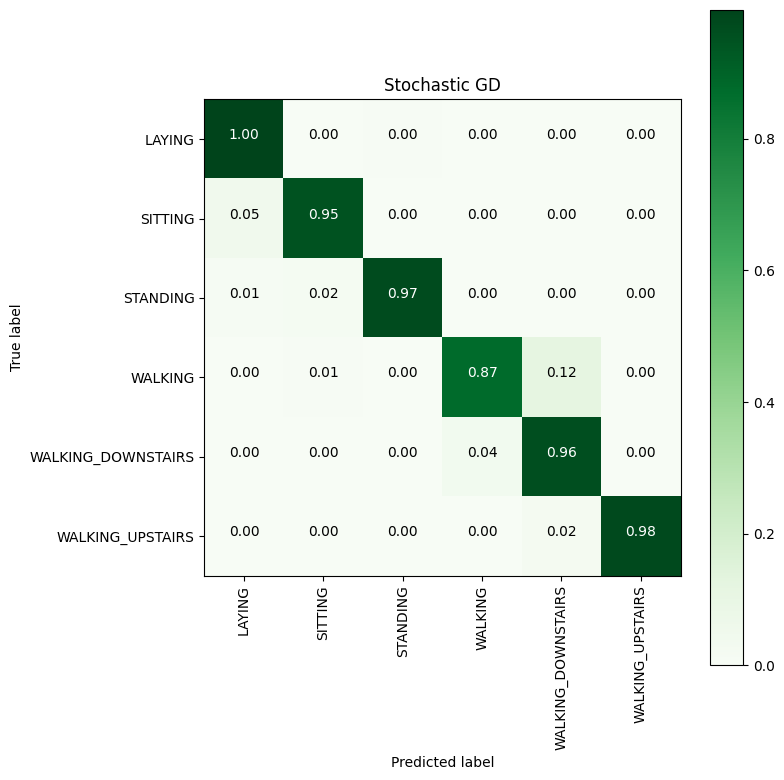

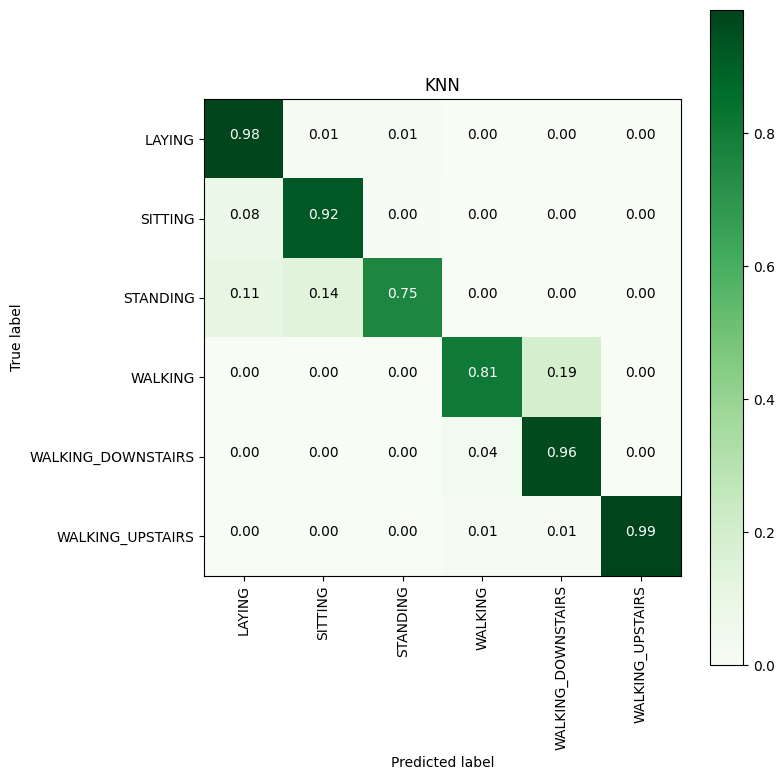

,Model,Accuracy,AUC-ROC,Precision,Recall,F1 Score,Time Taken
2,Stochastic GD,0.955887,0.995499,0.959059,0.955705,0.956587,2.403500
0,Logistic Regression,0.946386,0.997238,0.948632,0.944543,0.945674,1.001566
3,KNN,0.907024,0.984640,0.914806,0.901284,0.903244,0.006712
1,SVC,0.894808,0.991812,0.904372,0.893962,0.894326,65.273399


In [335]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=np.unique(y_test))
print("\n------Training & Testing------\n")

for name, model in models:
    start_time = time.time()
    model.fit(X_train, y_train)
    end_time = time.time()
    time_taken = end_time - start_time
    y_pred = model.predict(X_test)
    predicted_probabilities = model.predict_proba(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test_bin, predicted_probabilities, multi_class='ovo')
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(8,8))
    plot_confusion_matrix(cm, classes=labels, normalize=True, title=name)
    plt.show()

    results['Model'].append(name)
    results['Accuracy'].append(accuracy)
    results['AUC-ROC'].append(roc_auc)
    results['Precision'].append(precision)
    results['Recall'].append(recall)
    results['F1 Score'].append(f1)
    results['Time Taken'].append(time_taken)

results_df = pd.DataFrame(results).sort_values(by='Accuracy', ascending=False)
results_df

In [ ]:
plt.figure(figsize=(8, 6))

for name, model in models:
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for all models')
plt.legend(loc='lower right')
plt.grid(False)
plt.show()

## Deep Learning

### Importing Libraries

In [174]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras import backend as K
from keras.utils import to_categorical
from tensorflow.keras import layers, models
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, BatchNormalization

np.random.seed(42)

### Gathering Data

- Raw data signals from Accelerometer and Gyroscope. The signals are in x,y,z directions.
- Sensor signals are filtered to have only body acceleration excluding the acceleration due to gravity.
- Triaxial acceleration from the accelerometer is total acceleration.

In [175]:
SIGNALS = [
    "body_acc_x",
    "body_acc_y",
    "body_acc_z",
    "body_gyro_x",
    "body_gyro_y",
    "body_gyro_z",
    "total_acc_x",
    "total_acc_y",
    "total_acc_z"
]

ACTIVITIES = {
    0: 'WALKING',
    1: 'WALKING_UPSTAIRS',
    2: 'WALKING_DOWNSTAIRS',
    3: 'SITTING',
    4: 'STANDING',
    5: 'LAYING',
}

DATADIR = 'UCI_HAR_Dataset'

### Defining various functions for ease of use

- **_count_classes**: Function to count number of classes
- **confusion_matrix**: Displaying the confusion matrix
- **read_csv_file**: Read csv function with some parameters
- **load_signals**: [INPUT DATA] Loading the signals for train and test i.e., Raw time series data
- **load_y**: [OUTPUT DATA] Loading labels for train and test data
- **load_data**: Loads all data by using load_signals and load_y functions

In [176]:
def _count_classes(y):
    return len(set([tuple(category) for category in y]))

def confusion_matrix(y_true, y_pred):
    y_true = pd.Series([ACTIVITIES[y] for y in np.argmax(y_true, axis=1)])
    y_pred = pd.Series([ACTIVITIES[y] for y in np.argmax(y_pred, axis=1)])

    return pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Pred'])

def read_csv_file(filename):
    return pd.read_csv(filename, delim_whitespace=True, header=None)

def load_signals(subset):
    signals_data = []

    for signal in SIGNALS:
        filename = f'UCI_HAR_Dataset/{subset}/Inertial Signals/{signal}_{subset}.txt'
        signals_data.append(read_csv_file(filename).values)

    # Transpose is used to change the dimensionality of the output,
    # aggregating the signals by combination of sample/timestep.
    # Resultant shape is (7352 train/2947 test samples, 128 timesteps, 9 signals)
    return np.transpose(signals_data, (1, 2, 0))

The objective that we are trying to predict is an integer, from 1 to 6, that represents a human activity. We return a binary representation of every sample objective as a 6 bits vector using One Hot Encoding.

In [177]:
def load_y(subset):
    
    filename = f'UCI_HAR_Dataset/{subset}/y_{subset}.txt'
    y = read_csv_file(filename)[0]

    return pd.get_dummies(y).values

def load_data():
    """
    Obtain the dataset from multiple files.
    Returns: X_train, X_test, y_train, y_test
    """
    X_train, X_test = load_signals('train'), load_signals('test')
    y_train, y_test = load_y('train'), load_y('test')

    return X_train, X_test, y_train, y_test

### Creating a session

In [178]:
session_conf = tf.compat.v1.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
sess = tf.compat.v1.Session(graph=tf.compat.v1.get_default_graph(), config=session_conf)
tf.compat.v1.keras.backend.set_session(sess)

### Initializing variables

In [179]:
epochs = 30
batch_size = 16
n_hidden = 32

X_train, X_test, y_train, y_test = load_data()

timesteps = len(X_train[0])
input_dim = len(X_train[0][0])
n_classes = _count_classes(y_train)

print(f"Timesteps: {timesteps}")
print(f"Input Dimensions: {input_dim}")
print(f"X_train length: {len(X_train)}")

Timesteps: 128
Input Dimensions: 9
X_train length: 7352


### Model Formation

In [191]:
model = Sequential()

model.add(LSTM(n_hidden, return_sequences=True, input_shape=(timesteps, input_dim)))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))

model.add(Dense(int(n_hidden/2), activation='relu'))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))

model.add(LSTM(int(n_hidden/2), return_sequences=False))
model.add(BatchNormalization())
model.add(layers.Activation('relu'))

model.add(Dense(n_classes, activation='sigmoid'))

model.summary()

Model: "sequential_61"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_114 (LSTM)             (None, 128, 32)           5376      
                                                                 
 batch_normalization_61 (Ba  (None, 128, 32)           128       
 tchNormalization)                                               
                                                                 
 activation_56 (Activation)  (None, 128, 32)           0         
                                                                 
 dense_61 (Dense)            (None, 128, 16)           528       
                                                                 
 batch_normalization_62 (Ba  (None, 128, 16)           64        
 tchNormalization)                                               
                                                                 
 activation_57 (Activation)  (None, 128, 16)         

### Model Compiling & Training

In [192]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
230/230 [==============================] - 9s 34ms/step - loss: 1.1654 - accuracy: 0.5770 - val_loss: 1.6849 - val_accuracy: 0.3889
Epoch 2/10
230/230 [==============================] - 8s 33ms/step - loss: 0.5170 - accuracy: 0.8406 - val_loss: 0.8017 - val_accuracy: 0.7095
Epoch 3/10
230/230 [==============================] - 7s 32ms/step - loss: 0.2648 - accuracy: 0.9259 - val_loss: 0.7205 - val_accuracy: 0.7818
Epoch 4/10
230/230 [==============================] - 7s 32ms/step - loss: 0.1943 - accuracy: 0.9373 - val_loss: 0.3269 - val_accuracy: 0.8975
Epoch 5/10
230/230 [==============================] - 8s 33ms/step - loss: 0.1877 - accuracy: 0.9328 - val_loss: 0.4209 - val_accuracy: 0.8690
Epoch 6/10
230/230 [==============================] - 8s 33ms/step - loss: 0.1598 - accuracy: 0.9400 - val_loss: 0.3090 - val_accuracy: 0.9050
Epoch 7/10
230/230 [==============================] - 7s 33ms/step - loss: 0.1507 - accuracy: 0.9399 - val_loss: 0.5268 - val_accuracy: 0.8527

### Testing Evaluation

In [193]:
score = model.evaluate(X_test, y_test)

 1/93 [..............................] - ETA: 1s - loss: 0.0651 - accuracy: 0.9688

93/93 [==============================] - 1s 7ms/step - loss: 0.2914 - accuracy: 0.9111


### Results

In [195]:
print(f"Accuracy: {(score[1])*100:.2f}%")
print(f"Loss: {score[0]:.2f}")

Accuracy: 91.11%
Loss: 0.29


### Plotting Confusion Matrix

In [198]:
def plot_confusion_matrix(cm, classes, normalize=False, title='Confusion Matrix', cmap=plt.cm.Greens):

    cm = np.array(cm)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1, keepdims=True)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=90)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, format(cm[i, j], fmt),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.tight_layout()

93/93 [==============================] - 1s 7ms/step


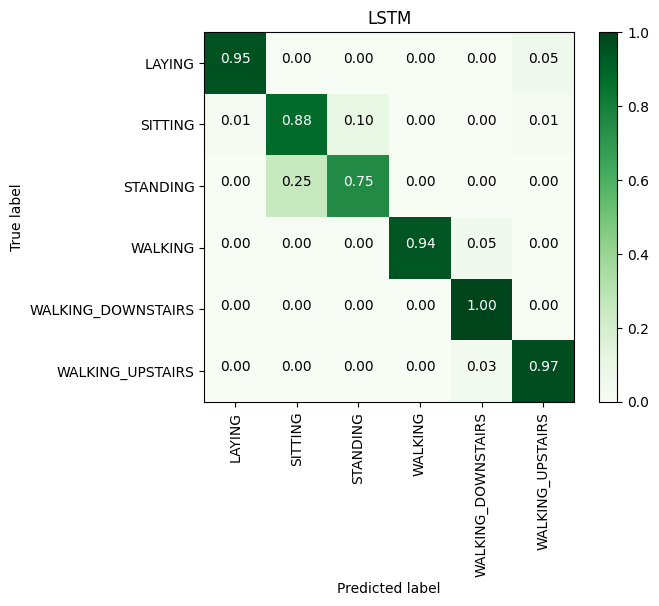

In [199]:
lstm_cm = confusion_matrix(y_test, model.predict(X_test))
plot_confusion_matrix(lstm_cm, classes=labels, normalize=True, title="LSTM")